<a href="https://colab.research.google.com/github/Gkimatov/CS-460/blob/main/460_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#this command will download the file
!gdown --id 12dUmOsgM5iFxIxTTx04OshoW_GkHjXOk

In [ ]:
df=pd.read_csv('NYC_data_clean.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3881989 entries, 0 to 3881988
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Unnamed: 0       int64 
 1   arrest_date      object
 2   ofns_desc        object
 3   offense_level    object
 4   age_group        object
 5   perp_sex         object
 6   arrest_boro      object
 7   arrest_precinct  int64 
dtypes: int64(2), object(6)
memory usage: 236.9+ MB


In [ ]:
df['arrest_date']=pd.to_datetime(df['arrest_date'])

In [ ]:
arrest_year=df['arrest_date'].dt.year

In [ ]:
len(arrest_year)

3881989

In [ ]:
arrest_year.value_counts(ascending=True)

2019    161878
2018    184860
2017    225419
2016    250745
2015    259333
2006    287856
2013    298305
2012    303697
2014    304175
2007    313739
2008    319502
2009    323116
2010    323694
2011    325670
Name: arrest_date, dtype: int64

In [ ]:
df['offense_level'] = df['offense_level'].map({ 'F':'Felony',
                                                'M':'Misdemeanor',
                                                'V':'Violation',
                                                'I':'Infractions'})
df['arrest_boro'] = df['arrest_boro'].map({'K':'Brooklyn',
                                           'B':'Bronx',
                                           'M':'Manhattan',
                                           'Q':'Queens',
                                           'S':'Staten Island'})

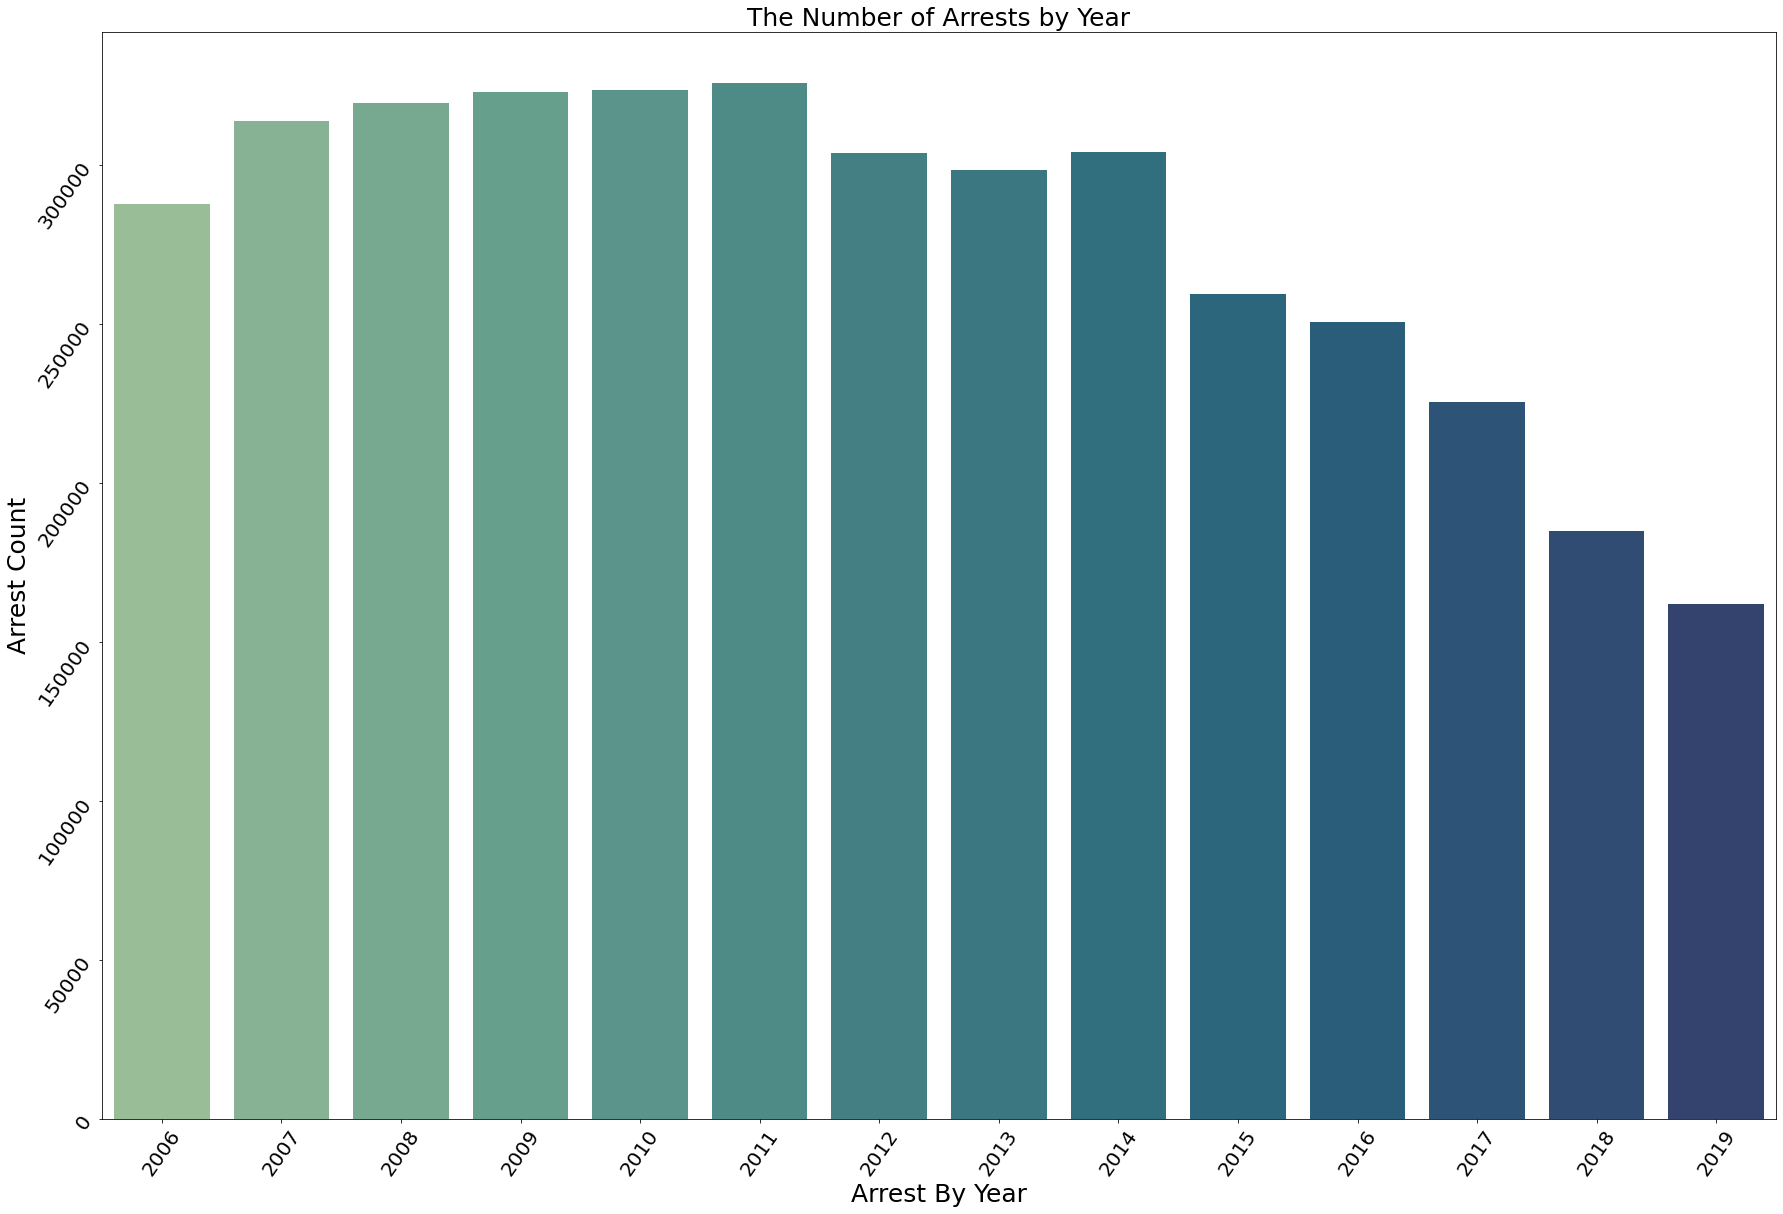

In [ ]:
plt.figure(figsize=(30,20))
sns.countplot(x=arrest_year, palette='crest')
_ = plt.title('The Number of Arrests by Year',fontsize=25)
_ = plt.xlabel('Arrest By Year',fontsize=25)
_ = plt.ylabel('Arrest Count',fontsize=25)
_ = plt.yticks(fontsize=20,rotation=55)
_ = plt.xticks(fontsize=20,rotation=55)

***As we can see by value count the number of crime was higher in 2011 and the lowest rate was in 2019 in the overall NYC.***

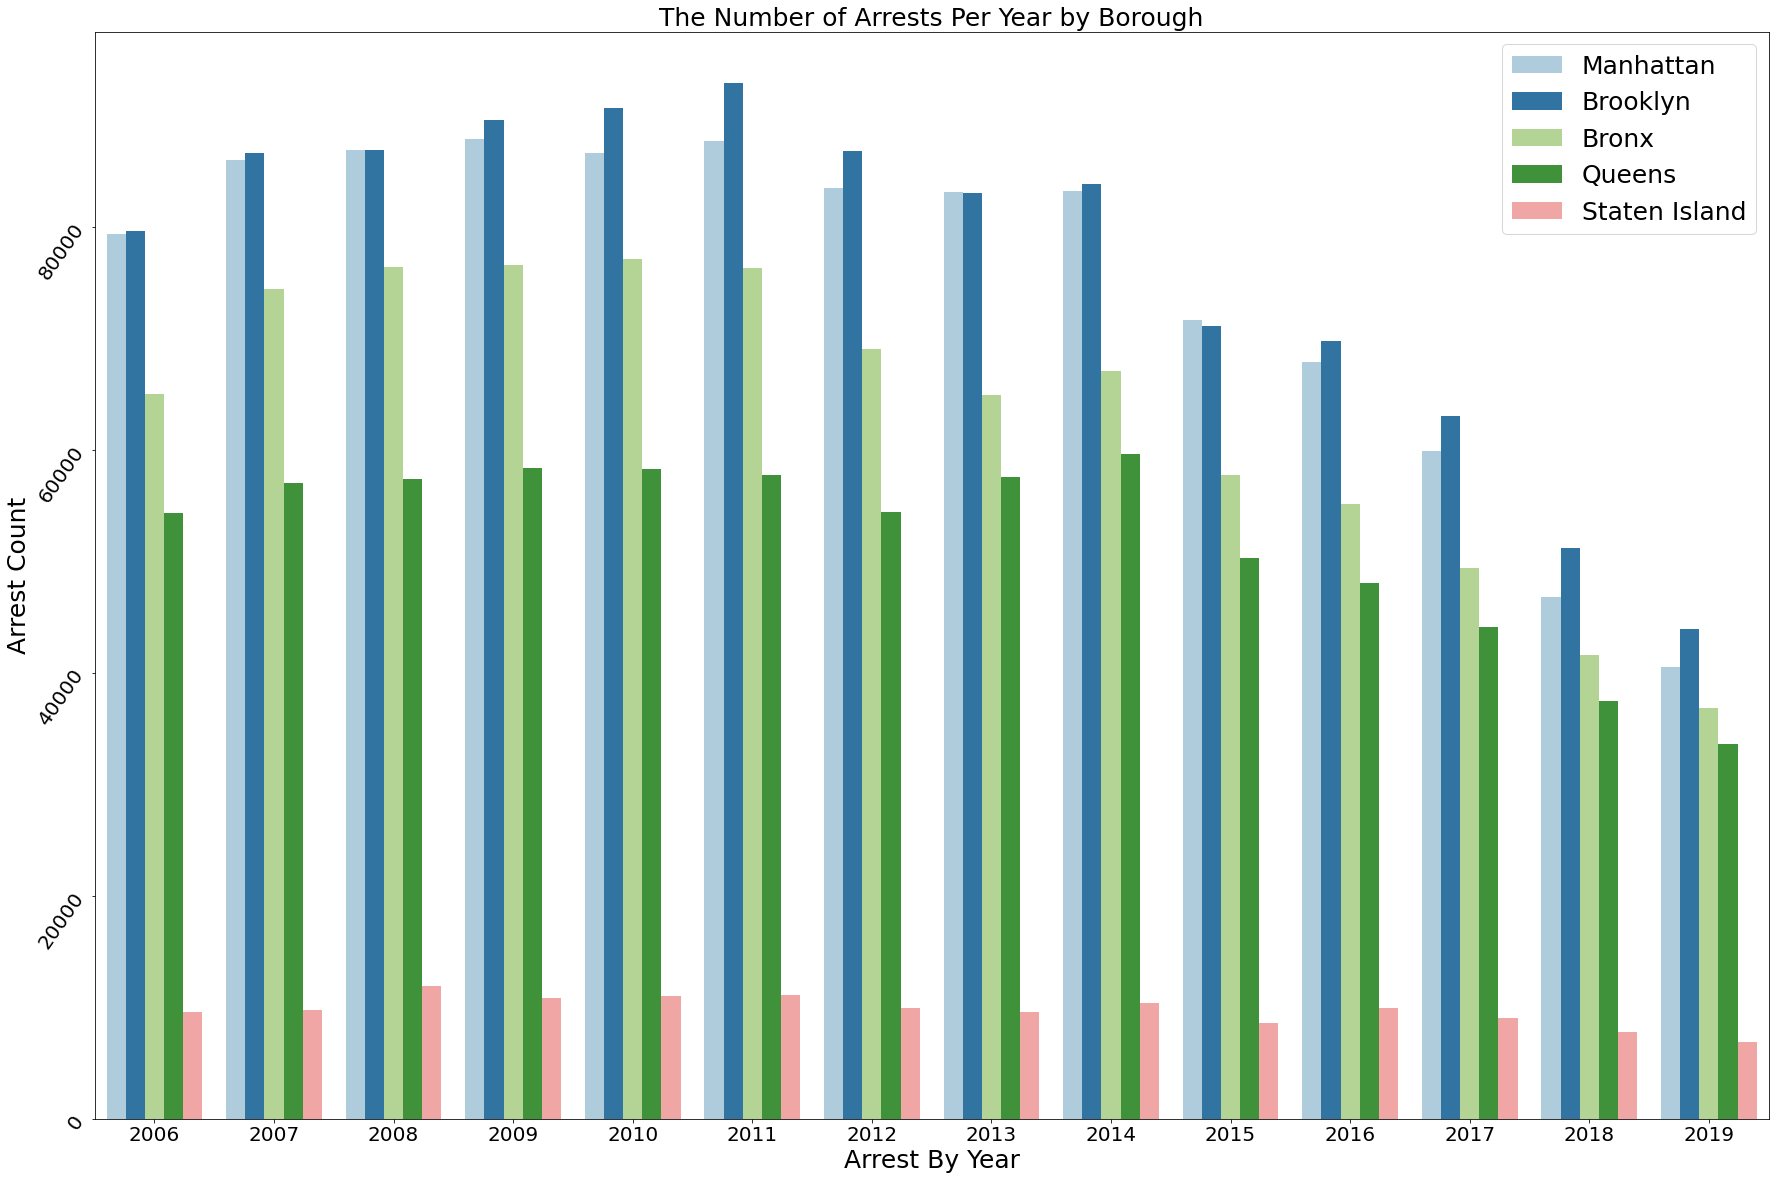

In [ ]:
plt.figure(figsize=(30,20))
sns.countplot(x=arrest_year,hue=df['arrest_boro'],palette='Paired')
_ = plt.title('The Number of Arrests Per Year by Borough',fontsize=25)
_ = plt.xlabel('Arrest By Year',fontsize=25)
_ = plt.ylabel('Arrest Count',fontsize=25)
_ = plt.legend(loc="upper right",fontsize=25)
_ = plt.xticks(fontsize=20)
_ = plt.yticks(fontsize=20,rotation=55)

***As we can see in every year from 2006 to 2019 consistently the crime rate is higher in Brooklyn followed by Manhattan, Bronx, Queens and Staten Island***

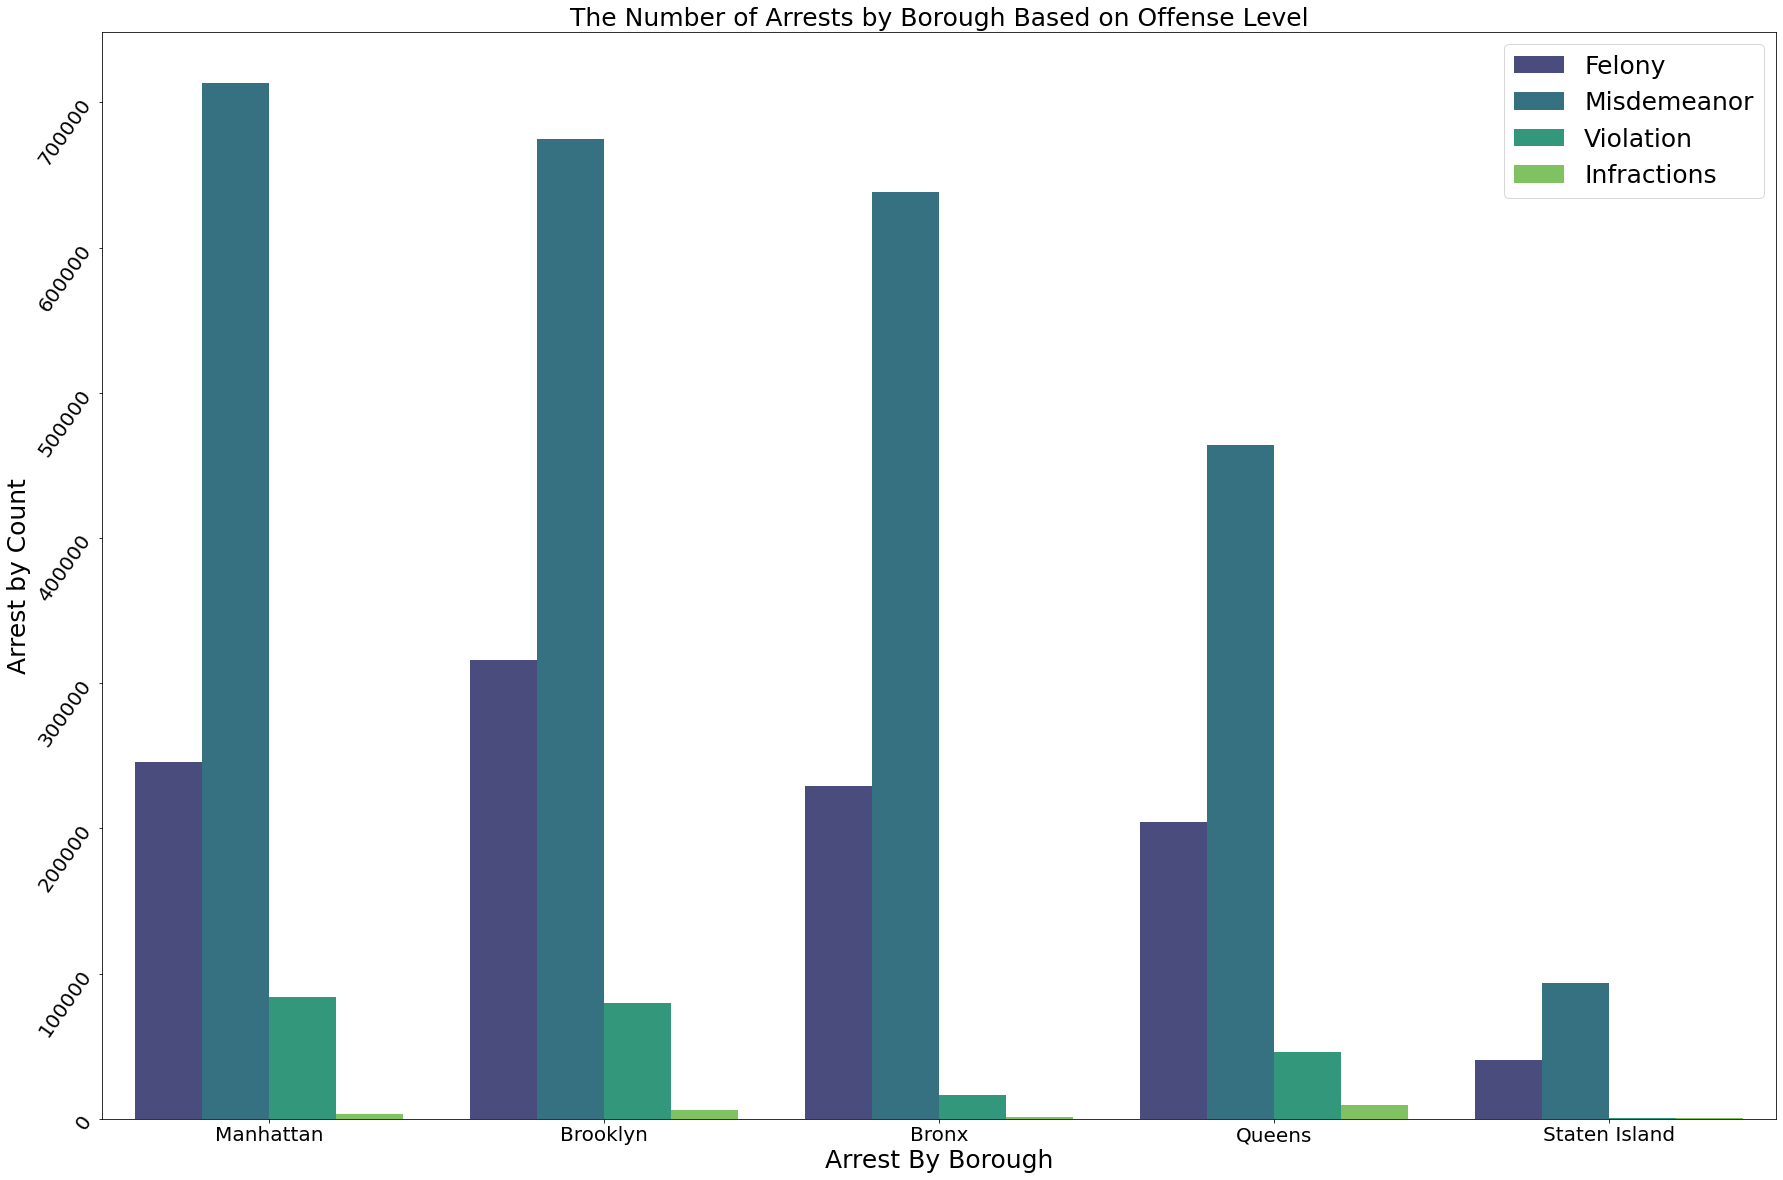

In [ ]:
plt.figure(figsize=(30,20))
sns.countplot(x=df['arrest_boro'],hue=df['offense_level'],palette='viridis')
_ = plt.title('The Number of Arrests by Borough Based on Offense Level',fontsize=25)
_ = plt.xlabel('Arrest By Borough',fontsize=25)
_ = plt.ylabel('Arrest by Count',fontsize=25)
_ = plt.legend(loc="upper right",fontsize=25)
_ = plt.xticks(fontsize=20)
_ = plt.yticks(fontsize=20,rotation=55)

***As we can see the Misdemeanor crime is higher in every borough and then followed by Felony, Violation and Infractions.***

Just Checking
